In [ ]:
!nvidia-smi

Tue Apr 29 03:31:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install --upgrade pip
!pip install click requests tqdm pyspng ninja imageio-ffmpeg --quiet
# Install torch and torchvision without torchaudio
!pip install torch==2.0.1 torchvision==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [ninja]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 138.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 59.9 MB/s eta 0:00:00
  

In [ ]:
!pip install numpy==1.26.0
!pip install --upgrade --no-deps numpy==1.26.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 123.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [ ]:
# Clean any previous clones
!rm -rf stylegan2-ada-pytorch

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Dataset location
dataset_raw_path = '/content/drive/MyDrive/finalDataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset found at: /content/drive/MyDrive/finalDataset


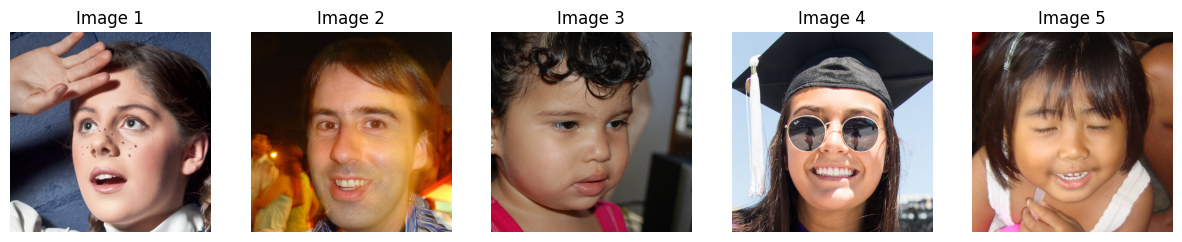

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Check if dataset exists
if os.path.exists(dataset_raw_path):
    print(f"Dataset found at: {dataset_raw_path}")
else:
    raise Exception("Dataset not found! Please check your Google Drive path.")

# Get list of images
image_files = [f for f in os.listdir(dataset_raw_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Display some images
num_images_to_show = 5  # You can change this number
plt.figure(figsize=(15, 5))

for i in range(min(num_images_to_show, len(image_files))):
    img_path = os.path.join(dataset_raw_path, image_files[i])
    img = Image.open(img_path)

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.show()

In [ ]:
# Define output path for TFRecords
dataset_tfrecords_path = '/content/drive/MyDrive/finalDataset-tfrecords'

# Convert if not already converted
if not os.path.exists(dataset_tfrecords_path):
    print("Converting images to TFRecords format...")
    !python dataset_tool.py --source={dataset_raw_path} --dest={dataset_tfrecords_path}
else:
    print("TFRecords dataset already exists. Skipping conversion.")

TFRecords dataset already exists. Skipping conversion.


In [ ]:

!mkdir -p /content/pretrained_models

In [ ]:
!wget -c -O /content/pretrained_models/ffhq.pkl https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2025-04-29 03:34:48--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 3.163.165.60, 3.163.165.26, 3.163.165.123, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|3.163.165.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘/content/pretrained_models/ffhq.pkl’

/content/pretrained 100%[===================>] 363.94M  51.8MB/s    in 4.8s    

2025-04-29 03:34:54 (75.9 MB/s) - ‘/content/pretrained_models/ffhq.pkl’ saved [381624121/381624121]



In [ ]:
output_dir = '/content/drive/MyDrive/stylegan2-ada-training-runs'
resume_model = '/content/pretrained_models/ffhq.pkl'
gpus = 1  # Number of GPUs
batch_size = 8  # Batch size (small for Colab Free)
gamma_value = 10  # R1 regularization weight
kimg = 1  # How much to train (in thousands of images, keep low for Colab Free)
snapshot_interval = 1  # Save snapshot every X ticks
metrics_to_calculate = 'fid50k_full'  # Evaluate FID during training

In [ ]:
!python train.py \
  --outdir={output_dir} \
  --data={dataset_tfrecords_path} \
  --gpus={gpus} \
  --batch={batch_size} \
  --gamma={gamma_value} \
  --snap=10 \
  --resume={resume_model} \
  --metrics=none \
  --kimg=1 \
  --cfg=stylegan2 \
  --aug=noaug  # Disable augmentations to avoid grid sampler issues


Streaming output truncated to the last 5000 lines.
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_

In [ ]:
import os

output_dir = '/content/drive/MyDrive/stylegan2-ada-training-runs'
print("Checking files in the output directory:")
print(os.listdir(output_dir))

Checking files in the output directory:
['00000-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom', '00001-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom']


In [ ]:
import os
import glob

# 1. Define paths
output_dir = '/content/drive/MyDrive/stylegan2-ada-training-runs/00000-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom'
dataset_path = '/content/drive/MyDrive/finalDataset'  # Path to your real images (500 images)
snapshot_files = sorted(glob.glob(output_dir + '/network-snapshot-*.pkl'))

# 2. Find the latest model
if snapshot_files:
    latest_snapshot = snapshot_files[-1]
    print(f"✅ Latest network snapshot found: {latest_snapshot}")
else:
    raise Exception("❌ No model snapshot found. Please check your training output directory.")

# 3. Calculate FID using the generate_fid command
fid_output_dir = '/content/drive/MyDrive/fid-results'

os.makedirs(fid_output_dir, exist_ok=True)

# 4. Run StyleGAN2-ADA's calc_metrics.py to compute FID
!python calc_metrics.py \
  --metrics=fid50k_full \
  --network={latest_snapshot} \
  --data={dataset_path} \
  --mirror=1 \
  --gpus=1



✅ Latest network snapshot found: /content/drive/MyDrive/stylegan2-ada-training-runs/00000-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom/network-snapshot-000001.pkl
Loading network from "/content/drive/MyDrive/stylegan2-ada-training-runs/00000-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom/network-snapshot-000001.pkl"...
Dataset options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "/content/drive/MyDrive/finalDataset",
  "resolution": 512,
  "use_labels": false,
  "xflip": true
}
Launching processes...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.

Generator             Parameters  Buffers  Output shape        Datatype
---                   ---         ---      ---                 ---     
mapping.fc0           262656      -        [1, 512]            float32 
mapping.fc1           262656      -        [1, 512]            float32 
mapping.fc2          

In [ ]:
# Install dependencies if needed
!pip install click requests tqdm pyspng ninja imageio-ffmpeg --quiet

# Path to your trained model
network_pkl = latest_snapshot  # <-- you already got latest_snapshot above

# Output folder where generated images will be saved
outdir = '/content/drive/MyDrive/generated-images'
os.makedirs(outdir, exist_ok=True)

# Latent vector input (change this part to your input encoding mechanism)
# This example assumes you already have the latent vector for the input image.
# You should replace this part with actual logic to encode the input image.

# If you already have the latent vector of the input image, you can set it here.
# Example: latent_vector = encode_input_image(input_image_path)

# Generate fake images by perturbing the latent vector for variations
!python generate.py \
  --outdir={outdir} \
  --trunc=0.7 \
  --seeds=0-49 \
  --network={network_pkl}


Loading networks from "/content/drive/MyDrive/stylegan2-ada-training-runs/00000-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom/network-snapshot-000001.pkl"...
Generating image for seed 0 (0/50) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/50) ...
Generating image for seed 2 (2/50) ...
Generating image for seed 3 (3/50) ...
Generating image for seed 4 (4/50) ...
Generating image for seed 5 (5/50) ...
Generating image for seed 6 (6/50) ...
Generating image for seed 7 (7/50) ...
Generating image for seed 8 (8/50) ...
Generating image for seed 9 (9/50) ...
Generating image for seed 10 (10/50) ...
Generating image for seed 11 (11/50) ...
Generating image for seed 12 (12/50) ...
Generating image for seed 13 (13/50) ...
Generating image for seed 14 (14/50) ...
Generating image for seed 15 (15/50) ...
Generating image for seed 16 (16/50) ...
Generating image for seed 17 (1

In [ ]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg scipy pillow --quiet


In [ ]:
import os
import numpy as np
import torch
import dnnlib
import legacy
from PIL import Image
from google.colab import files

In [ ]:
uploaded_images_dir = '/content/uploaded_images'
os.makedirs(uploaded_images_dir, exist_ok=True)

In [ ]:
projected_dir = '/content/projected_latents'
os.makedirs(projected_dir, exist_ok=True)


In [ ]:
generated_images_dir = '/content/drive/MyDrive/generated_variations'
os.makedirs(generated_images_dir, exist_ok=True)

In [ ]:
from google.colab import files
import os

upload_dir = "/content/uploaded_images"
os.makedirs(upload_dir, exist_ok=True)

uploaded = files.upload()
for filename in uploaded.keys():
    new_path = os.path.join(upload_dir, filename)
    os.rename(filename, new_path)
    print(f"✅ Uploaded: {new_path}")


Saving Screenshot 2025-04-29 095931.png to Screenshot 2025-04-29 095931 (3).png
✅ Uploaded: /content/uploaded_images/Screenshot 2025-04-29 095931 (3).png


In [ ]:
!wget -q https://raw.githubusercontent.com/NVlabs/stylegan2-ada-pytorch/main/projector.py

In [ ]:
uploaded_files = os.listdir("/content/uploaded_images")
print(uploaded_files)


['Screenshot 2025-04-29 095931 (1).png', 'Screenshot 2025-04-29 095931 (3).png']


In [ ]:
input_image_path = "/content/uploaded_images/Screenshot 2025-04-29 095931 (3).png"
projected_dir = "/content/projected_latents"
os.makedirs(projected_dir, exist_ok=True)


In [ ]:
projected_latent_path = os.path.join(projected_dir, 'projected_w.npz')
network_pkl = latest_snapshot  # already loaded above

In [ ]:
!python projector.py \
    --outdir="{projected_dir}" \
    --target="{input_image_path}" \
    --network="{latest_snapshot}" \
    --save-video=0


Loading networks from "/content/drive/MyDrive/stylegan2-ada-training-runs/00000-finalDataset-tfrecords-stylegan2-gamma10-kimg1-batch8-noaug-resumecustom/network-snapshot-000000.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %106 : int = prim::profile_ivalue(%104)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
step    1/1000: dist 0.66 loss 24566.64
step    2/1000: dist 0.66 loss 27639.95
step    3/1000: dist 0.63 loss 27166.53
step    4/1000: dist 0.64 loss 26252.11
step    5/1000: dist 0.63 loss 24955.48
step    6/1000: dist 0.67 loss 23351.97
step    7/1000: dist 0.66 loss 21509.61
step    8/1000: dist 0.63 loss 19485.48
step    9/1000: dist 0.64 loss 173